# Linear Regression California Education Level and Salary

## 1. Import Libraries and Data 
## 2. Data Cleaning
## 3. Check for Extreme Values
## 4. Data Prep for Regression Analysis
## 5. Regression analysis
## 6. Check Model Performance with statistics
## 7. Conclusion

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Allow graphs created to be displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data/02 Data'

In [4]:
# Import Data

df = pd.read_pickle(os.path.join(path,'prepared data','March 2022 clean-a.pkl'))

In [5]:
df.shape

(2152679, 25)

In [6]:
df.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,...,18.8,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,13,1,1,2,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,...,29.2,9.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,12.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,10.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,13.4,6.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA


### 2. Data Cleaning

In [7]:
#subset into California as it is the state with 2nd highest amount of workers (District of Columbia being 1)

In [8]:
df_cali =  df[df['state']=='CALIFORNIA']

In [9]:
df_cali.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
21,AMERICAN BATTLE MONUMENTS COMMISSION,United States,40-44,BACHELORS,13.0,10 - 14,HUMAN RESOURCES MANAGEMENT,Administrative,GS-GENERAL SCHEDULE,0,...,14.6,6.0,PERSONNEL MGMT & INDUSTRIAL RELATIONS,2.0,AMERICAN BATTLE MONUMENTS COMMISSION,13,1,1,8,CALIFORNIA
122,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,60-64,MASTERS,13.0,10 - 14,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,GS-GENERAL SCHEDULE,0,...,10.0,10.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,DEPARTMENT OF THE AIR FORCE,17,1,1,8,CALIFORNIA
123,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,40-44,BACHELORS,13.0,5 - 9,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,GS-GENERAL SCHEDULE,0,...,8.3,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,DEPARTMENT OF THE AIR FORCE,13,1,1,8,CALIFORNIA
129,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,65 or more,BETWEEN HS & BACHELORS,9.0,35 or more,TECHNICAL WRITING AND EDITING,Administrative,GS-GENERAL SCHEDULE,0,...,37.7,11.0,INFORMATION AND ARTS,2.0,DEPARTMENT OF THE AIR FORCE,10,1,1,8,CALIFORNIA
147,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,55-59,MASTERS,13.0,20 - 24,OPERATIONS RESEARCH,Professional,GS-GENERAL SCHEDULE,1,...,22.2,9.0,MATHEMATICS AND STATISTICS,1.0,DEPARTMENT OF THE AIR FORCE,17,1,1,8,CALIFORNIA


In [10]:
df_cali.shape

(141103, 25)

In [11]:
# I am looking at education code and salary as you would think the more education you have, the higher the salary

In [12]:
# Check for missing values

df_cali.isnull().sum()

sub_agency                 0
country                    0
age_level                  0
education_level            0
pay_grade              51340
years_grouping             0
occupation                 0
occupation_category        0
pay_plan                   0
stem                       0
supervisor_status          0
full_time                  0
work_status                0
date                       0
salary                   624
years_of_service           0
age_level_code             0
occupation_family      71108
occupation_code            0
agency                     0
education_code             0
work_status_code           0
full_time_code             0
supervisor_code            0
state                      0
dtype: int64

In [14]:
# Missing values are a .004% of whole so I will just drop them for this analysis
df_cali.dropna(subset = ['salary'], inplace = True)

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_29500/2009302436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cali.dropna(subset = ['salary'], inplace = True)


In [15]:
df_cali.isnull().sum()

sub_agency                 0
country                    0
age_level                  0
education_level            0
pay_grade              50833
years_grouping             0
occupation                 0
occupation_category        0
pay_plan                   0
stem                       0
supervisor_status          0
full_time                  0
work_status                0
date                       0
salary                     0
years_of_service           0
age_level_code             0
occupation_family      71028
occupation_code            0
agency                     0
education_code             0
work_status_code           0
full_time_code             0
supervisor_code            0
state                      0
dtype: int64

In [16]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140479 entries, 21 to 2155550
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sub_agency           140479 non-null  object 
 1   country              140479 non-null  object 
 2   age_level            140479 non-null  object 
 3   education_level      140479 non-null  object 
 4   pay_grade            89646 non-null   float64
 5   years_grouping       140479 non-null  object 
 6   occupation           140479 non-null  object 
 7   occupation_category  140479 non-null  object 
 8   pay_plan             140479 non-null  object 
 9   stem                 140479 non-null  int64  
 10  supervisor_status    140479 non-null  object 
 11  full_time            140479 non-null  object 
 12  work_status          140479 non-null  object 
 13  date                 140479 non-null  object 
 14  salary               140479 non-null  float64
 15  years_of_servic

### 3. Check for Extreme Values

/Users/bethanybreed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education_code', ylabel='Density'>

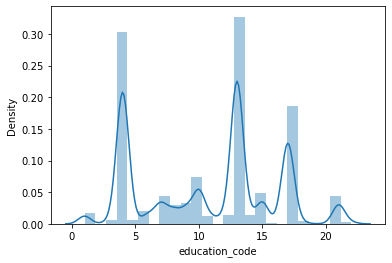

In [18]:
sns.distplot(df_cali['education_code'], bins=25) # Shows extreme values

/Users/bethanybreed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

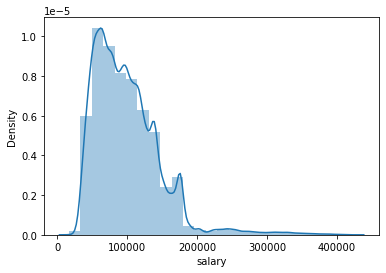

In [19]:
sns.distplot(df_cali['salary'], bins=25) # Shows extreme values

In [20]:
#I will leave them for now, as these are all within the expected ranges

### 4. Data Prep for Regression Analysis

### I am looking at Education Level and how it affects Salary

## Hypothesis Education Level affects Salary in a positive manner

In [21]:
#double check data types
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140479 entries, 21 to 2155550
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sub_agency           140479 non-null  object 
 1   country              140479 non-null  object 
 2   age_level            140479 non-null  object 
 3   education_level      140479 non-null  object 
 4   pay_grade            89646 non-null   float64
 5   years_grouping       140479 non-null  object 
 6   occupation           140479 non-null  object 
 7   occupation_category  140479 non-null  object 
 8   pay_plan             140479 non-null  object 
 9   stem                 140479 non-null  int64  
 10  supervisor_status    140479 non-null  object 
 11  full_time            140479 non-null  object 
 12  work_status          140479 non-null  object 
 13  date                 140479 non-null  object 
 14  salary               140479 non-null  float64
 15  years_of_servic

In [23]:
df_cali.salary.value_counts(dropna = False)

176300.0    3419
138171.0    1816
141064.0    1618
118635.0    1058
76135.0      954
            ... 
85267.0        1
88673.0        1
91312.0        1
87576.0        1
279286.0       1
Name: salary, Length: 21298, dtype: int64

In [24]:
df_cali.education_code.value_counts(dropna = False)

13    38608
4     35832
17    21994
10     8781
15     5769
7      5232
21     5168
9      3803
8      3450
6      2344
1      2117
14     1676
12     1582
11     1536
3       714
5       645
18      565
22      428
16      114
19       43
20       39
2        39
Name: education_code, dtype: int64

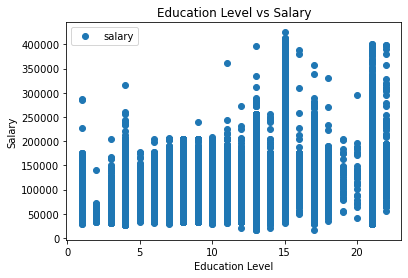

In [26]:
# Create a scatterplot using matplotlib to check how variables work together

df_cali.plot(x = 'education_code', y='salary',style='o') 
plt.title('Education Level vs Salary')  
plt.xlabel('Education Level')  
plt.ylabel('Salary')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cali['education_code'].values.reshape(-1,1)
y = df_cali['salary'].values.reshape(-1,1)

In [28]:
X

array([[13],
       [17],
       [13],
       ...,
       [13],
       [ 9],
       [17]])

In [29]:
y

array([[120618.],
       [130214.],
       [126597.],
       ...,
       [ 77059.],
       [ 62142.],
       [183300.]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [31]:
# Create a regression object.

regression = LinearRegression()

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

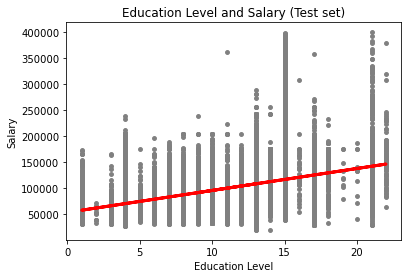

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Education Level and Salary (Test set)')
plot_test.xlabel('Education Level')
plot_test.ylabel('Salary')
plot_test.show()

### The line shows a positive impact that education level has on salary.  As the line has a low slope it is not a high correlation.  Also as you can the high amount of dots that are not close to the line, that implies the correlation is not strong as we would have expected it to be.

### 6. Check Model Performance with statistics

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [36]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4215.73433075]]
Mean squared error:  1823678501.9162877
R2 score:  0.217635785104919


In [37]:
y_predicted

array([[ 91921.2699738 ],
       [108784.2072968 ],
       [108784.2072968 ],
       ...,
       [ 91921.2699738 ],
       [ 70842.59832005],
       [108784.2072968 ]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(30)

,Actual,Predicted
0,94891.0,91921.269974
1,116202.0,108784.207297
2,84572.0,108784.207297
3,61564.0,70842.598320
4,76135.0,58195.395328
5,146839.0,108784.207297
6,152550.0,142510.081943
7,70039.0,96137.004305
8,61992.0,83489.801312
9,109508.0,108784.207297


## 7. Conclusion

### Follow up with the statistics show the MSE as very large indicating many plots that are far from our trend line. the R2 score is .217 We would hope to see a value closer to 1 to indicate a good fit.

### This shows that education code (the level of your education) does not directly correlate with your salary.